In [1]:
#create a rootDir and initialize ee and set up a map
import ee 
import os
import geemap

ee.Initialize()

rootDir = os.path.expanduser('~') + '/'
resultDir = rootDir + 'gfc_results/'

Map = geemap.Map()

In [2]:
#load false aoi
from utils import utils
asset = 'users/bornToBeAlive/aoi_PU'
aoi_name = utils.get_aoi_name(asset)

#display on the map
aoi = ee.FeatureCollection(asset)
Map.addLayer(aoi, {}, 'aoi_name')   
Map.centerObject(aoi, 8)

In [3]:
#create the shp file 
from scripts import make_aoi_shp

make_aoi_shp.make_aoi_shp(asset)

'/home/prambaud/gfc_wrapper_results/downloads/PU.shp'

In [4]:
from scripts import download_merge_glad as dmg
from scripts import download_merge_tandem as dmt
from utils import parameters as pm
from utils import utils
import os

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
aoi_name = utils.get_aoi_name(asset)


dwnl_dir = pm.getDwnDir()

#load the Hansen_GFC-2019-v1.7
types = pm.getTypes()
prefix = "https://storage.googleapis.com/earthenginepartners-hansen/GFC-2019-v1.7/Hansen_GFC-2019-v1.7_"
for type in types:
    pattern = prefix + type + "_{0}_{1}.tif"
    name = aoi_name+'_' + type
    dmg.download_merge(asset, pattern, dwnl_dir, name)
    
#load the tcc2010
prefix = "https://glad.umd.edu/Potapov/TCC_2010/treecover2010_"
pattern = prefix + '{0}_{1}.tif'
name = aoi_name+'_'+'treecover2010'
dmg.download_merge(asset, pattern, dwnl_dir, name)

#load the tandem tiles
pattern = "https://download.geoservice.dlr.de/FNF50/files/"
name = aoi_name+'_'+'tandem'
dmt.download_merge(asset, pattern, dwnl_dir, name)

'/home/prambaud/gfc_wrapper_results/downloads/PU_tandem.tif'

In [5]:
from scripts import make_map_Glad2010

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

make_map_Glad2010.make_map_Glad2010(asset, threshold)

'Glad 2010 map already performed'

In [6]:
from scripts import make_map_threshold

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

make_map_threshold.make_map_threshold(asset, threshold)

'gfc map threshold already performed'

In [7]:
from scripts import make_map_threshold_clump

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

make_map_threshold_clump.make_map_threshold_clump(asset, threshold)

'gfc clump map already performed'

stats already computed


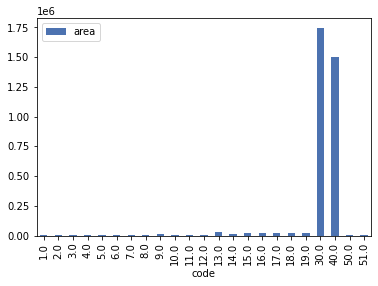

In [8]:
from scripts import compute_areas
import pandas as pd

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

file = compute_areas.compute_areas(asset, threshold)

df = pd.read_csv(file)
df

In [9]:
#######################################
#####   probleme de taille lié  à la val max (mer 255)
######################################


#from scripts import compute_areas_by_zone
#
##create false aoi
#asset = 'users/bornToBeAlive/aoi_PU'
#threshold = 20
#
#compute_areas_by_zone.compute_areas_by_zone(asset, threshold)

In [11]:
from scripts import compute_area_glad_2010
import pandas as pd

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

file = compute_area_glad_2010.compute_area_glad_2010(asset, threshold)
df = pd.read_csv(file)
df

stats already computed


,code,pixels,fnf_gfc_2000,chg_gfc,agree,pixels.1,area,percent
0,1.0,24409314,1.890557e+06,forest,forest,Stable,Yes,54.68
1,2.0,398922,3.089742e+04,forest,forest,Loss,No,0.89
2,3.0,283971,2.199420e+04,forest,non_forest,Loss,Yes,0.64
3,4.0,3625031,2.807669e+05,forest,non_forest,Stable,No,8.12
4,5.0,25793,1.997727e+03,non_forest,forest,Gain,Yes,0.06
5,6.0,2787022,2.158612e+05,non_forest,forest,Stable,No,6.24
6,7.0,488,3.779671e+01,non_forest,non_forest,Gain,No,0.00
7,8.0,13108437,1.015278e+06,non_forest,non_forest,Stable,Yes,29.37
